<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset

df = pd.read_csv("../survey-data.csv")

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore
0,0,I am a developer by profession,17,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,0.003998,-0.067585
1,1,I am a developer by profession,40,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,NaN,NaN,65000.0,NaN,0.003998,-0.067585
2,2,I am a developer by profession,50,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,65000.0,NaN,0.003998,-0.067585
3,3,I am learning to code,20,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,Too long,Easy,65000.0,NaN,0.003998,-0.067585
4,4,I am a developer by profession,20,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,65000.0,NaN,0.003998,-0.067585


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [9]:
## Write your code here
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore'],
      dtype='object', length=116)
Unnamed: 0                      int64
MainBranch                     object
Age                             int64
Employment                     object
RemoteWork                     object
                               ...   
SurveyEase                     object
ConvertedCompYearly           float64
JobSat                        float64
ConvertedCompYearly_MinMax    float64
ConvertedCompYearly_Zscore    float64
Length: 116, dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65115 entries, 0 to 65114
Columns: 116 entries, Unnamed: 0 to ConvertedCompYearly_Zscore
dtypes: float64(15), int64(2), object(99)
memory usage: 57.6+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [12]:
## Write your code here
def missing_values(df):
    return df.isnull().sum().to_frame()

missing_data=missing_values(df)
missing_data

,0
Unnamed: 0,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
SurveyEase,9125
ConvertedCompYearly,0
JobSat,36037
ConvertedCompYearly_MinMax,0


In [15]:
avg_job_sat=df['JobSat'].mean()
df['JobSat'].fillna(avg_job_sat,inplace=True)

In [16]:
missing_data=missing_values(df)
missing_data

,0
Unnamed: 0,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
SurveyEase,9125
ConvertedCompYearly,0
JobSat,0
ConvertedCompYearly_MinMax,0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [19]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                  38970
Independent contractor, freelancer, or self-employed                                                                                                  4817
Student, full-time                                                                                                                                    4664
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3547
Not employed, but looking for work                                                                                                                    2322
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

In [21]:
df['JobSat'].value_counts()

JobSat
6.935209     36037
8.000000      7497
7.000000      6371
6.000000      3745
9.000000      3618
10.000000     2247
5.000000      1955
3.000000      1161
4.000000      1128
2.000000       771
0.000000       310
1.000000       275
Name: count, dtype: int64

In [22]:
df['YearsCodePro'].value_counts()

YearsCodePro
2                     4157
3                     4090
5                     3520
10                    3245
4                     3212
Less than 1 year      2851
6                     2839
1                     2634
8                     2548
7                     2510
12                    1776
15                    1630
20                    1541
9                     1491
11                    1311
13                    1125
14                    1081
25                     987
16                     944
18                     864
17                     814
30                     687
24                     629
19                     516
22                     491
23                     448
26                     425
21                     379
27                     378
28                     342
35                     278
29                     196
40                     192
32                     191
34                     169
38                     134
33             

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [30]:
for col in df.columns:
    print(col)

Unnamed: 0
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [26]:
## Write your code here
from matplotlib_venn import venn2

# Split the language strings into sets
have_worked_with = set(', '.join(df['LanguageHaveWorkedWith']).split(', '))
want_to_work_with = set(', '.join(df['LanguageWantToWorkWith']).split(', '))

# Create a Venn diagram
plt.figure(figsize=(8, 8))
venn = venn2([have_worked_with, want_to_work_with], ('Have Worked With', 'Want to Work With'))
plt.title('Overlap Between Languages Worked With and Want to Work With')
plt.show()

# Prepare data for grouped bar chart (frequency counts)
have_worked_counts = pd.Series(', '.join(df['LanguageHaveWorkedWith']).split(', ')).value_counts()
want_to_work_counts = pd.Series(', '.join(df['LanguageWantToWorkWith']).split(', ')).value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Have Worked With': have_worked_counts,
    'Want to Work With': want_to_work_counts
}).fillna(0)

# Plot a grouped bar chart
combined_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'orange'])
plt.title('Comparison of Programming Languages Worked With vs. Want to Work With')
plt.ylabel('Count')
plt.xlabel('Programming Languages')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib_venn'

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [39]:
df['YearsCodePro'].value_counts()

YearsCodePro
2                     4157
3                     4090
5                     3520
10                    3245
4                     3212
0.5                   2851
6                     2839
1                     2634
8                     2548
7                     2510
12                    1776
15                    1630
20                    1541
9                     1491
11                    1311
13                    1125
14                    1081
25                     987
16                     944
18                     864
17                     814
30                     687
24                     629
19                     516
22                     491
23                     448
26                     425
21                     379
27                     378
28                     342
35                     278
29                     196
40                     192
32                     191
34                     169
38                     134
33             

In [ ]:
# df[]Age.replace({'25-34 years old':30,
#                 '35-44 years old':40,
#                 '18-24 years old':20,
#                 '45-54 years old':50,
#                 '55-64 years old':60,
#                 'Under 18 years old':17,
#                 '65 years or older':70
#                 },inplace=True)

In [42]:
df['YearsCodePro'].replace({"Less than 1 year":0.5,'More than 50 years':55},inplace=True)


In [44]:

# Calculate Pearson correlation coefficient
pearson_corr = df['JobSat'].corr(df['YearsCodePro'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr = df['JobSat'].corr(df['YearsCodePro'], method='spearman')

pearson_corr, spearman_corr


(0.07251053409727148, 0.0933688942518389)

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


C:\Users\gebre\AppData\Local\Temp\ipykernel_15656\1061437464.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


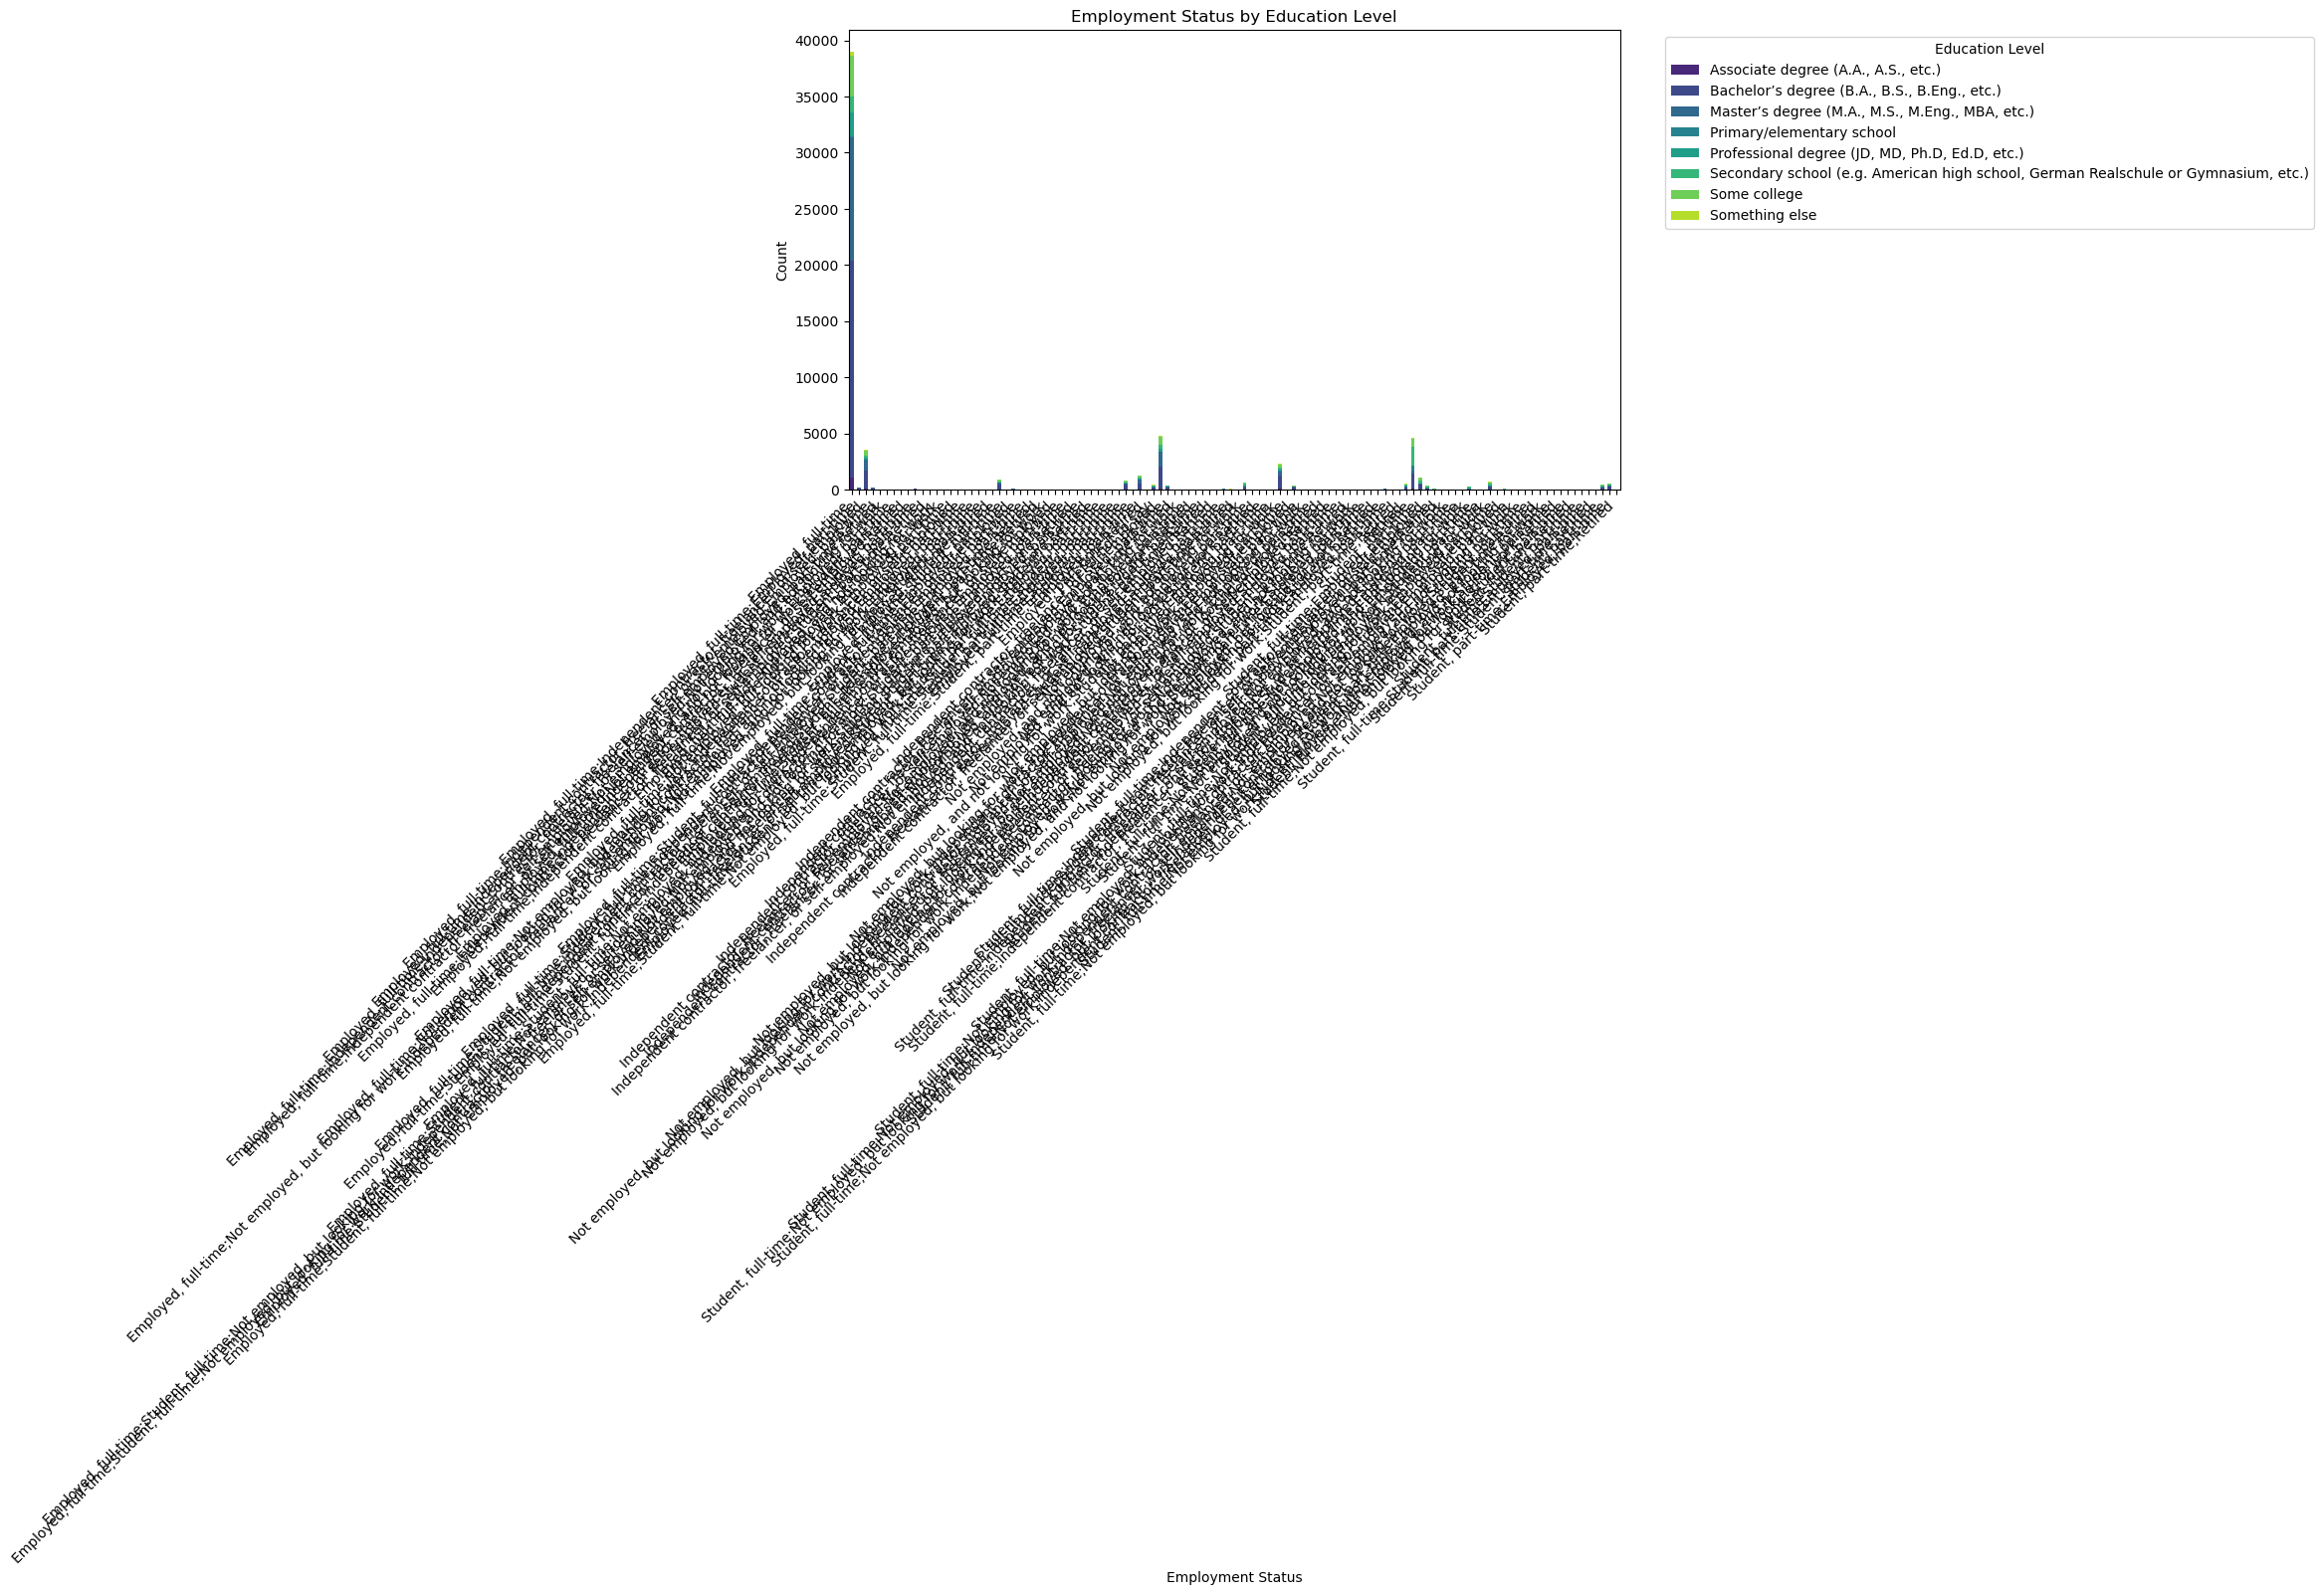

In [45]:
## Write your code here

# Create a cross-tabulation of Employment and EdLevel
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("viridis", n_colors=len(cross_tab.columns)))
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
